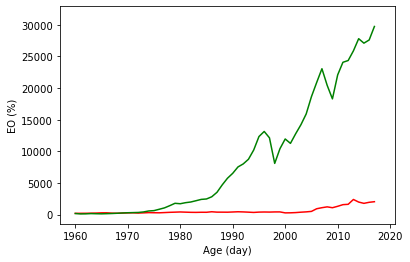

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

#x = np.arange(130, 190, 1)
#y = 97.928 * np.exp(- np.exp(-  0.1416 *( x - 146.1 )))
#z = 96.9684 * np.exp(- np.exp(-0.1530*( x - 144.4)))

dd = pd.read_csv('gh_south_korea0.csv')

x = dd['YEAR'].values
y = dd['GDP PER CAPITA(GHANA)'].values
z = dd['GDP PER CAPITA(SOUTH KOREA)'].values



fig, ax = plt.subplots(figsize = (10,6))
line1, = ax.plot(x, y, color = "r")
line2, = ax.plot(x, z, color = "g")

def update(num, x, y, z, line1, line2):
    line1.set_data(x[:num], y[:num])
    line2.set_data(x[:num], z[:num])
    return [line1,line2]

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, z, line1, line2],
                  interval=295, blit=True)

ax.set_xlabel('YEARS')
ax.set_ylabel('GDP per capita')

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

ani.save('anim5.mp4', writer = writer)
#plt.show()
#plt.show()

Applying augment function

In [8]:
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

In [9]:
aug  = augment(x, y, 20)

In [10]:
dff = pd.DataFrame(aug).transpose()

In [11]:
dff.rename(columns = {0:'YEAR', 1:'GDP PER CAPITA(GHANA)'}, inplace = True)
#dff.columns = dff.columns.astype(str)
dff.columns

Index(['YEAR', 'GDP PER CAPITA(GHANA)'], dtype='object')

In [12]:
aug1  = augment(x, z, 20)

In [13]:
dff1 = pd.DataFrame(aug1).transpose()

In [14]:
dff1.rename(columns = {0:'YEAR', 1:'GDP PER CAPITA(SOUTH KOREA)'}, inplace = True)
#dff.columns = dff.columns.astype(str)
dff1.columns

Index(['YEAR', 'GDP PER CAPITA(SOUTH KOREA)'], dtype='object')

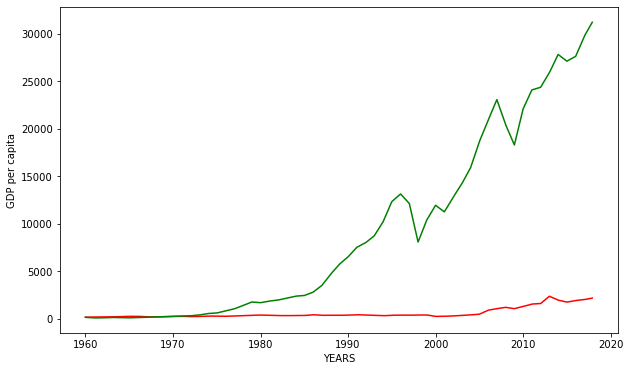

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

#x = np.arange(130, 190, 1)
#y = 97.928 * np.exp(- np.exp(-  0.1416 *( x - 146.1 )))
#z = 96.9684 * np.exp(- np.exp(-0.1530*( x - 144.4)))

dd = pd.read_csv('gh_south_korea0.csv')

x = dff['YEAR'].values
y = dff['GDP PER CAPITA(GHANA)'].values
z = dff1['GDP PER CAPITA(SOUTH KOREA)'].values



fig, ax = plt.subplots(figsize = (10,6))
line1, = ax.plot(x, y, marker = 'o', makerfacecolor = "blue", markersize=12, color = 'skyblue', linewidth=4)
line2, = ax.plot(x, z, marker = 'o', makerfacecolor = "green", markersize=12, color = 'springgreen', linewidth=4)

def update(num, x, y, z, line1, line2):
    line1.set_data(x[:num], y[:num])
    line2.set_data(x[:num], z[:num])
    return [line1,line2]

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, z, line1, line2],
                  interval=295, blit=True)

ax.set_xlabel('YEARS')
ax.set_ylabel('GDP per capita')

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

ani.save('anim6.mp4', writer = writer)
#plt.show()
#plt.show()